# Design flowsheet for the SOEC mode of a reversible Solid Oxide Cell

### Process Flow Diagram

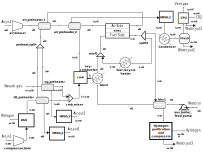

In [1]:
from IPython.core.display import SVG
SVG(filename='rsofc_soec_mode_PFD.svg')

## 1. Introduction
The figure above shows the process flow diagram of the rSOC (reversible solid oxide cell) plant in SOEC (solid oxide electrolysis cell) mode. The plant consists of five major sections: the ASU (air separation unit), the SOEC power island, the CPU (CO2 purification unit), the HRSG (heat recovery steam generator) and steam cycle.

In the SOEC mode, the rSOC operates by using steam as fuel to produce Hydrogen on its fuel side (cathode side), while air is used as sweep gas to remove diffused oxygen from its air side (anode side). To provide air to the air side of the rSOC, ambient air is compressed in an air blower and preheated via two preheaters to reach the required temperature to sweep through the air side. The oxygen rich air stream which exits the air side of the rSOC is used to preheat the fresh air feed in the first air preheater, subsequently it is split in a splitter and used to preheat oxygen from the ASU in the oxygen preheater and natural gas feed in the natural gas preheater. Finally, the oxygen rich air streams from both the oxygen and natural gas preheaters are sent to the HRSG where they are further cooled before release to the atmosphere.

This flowsheet example provides an off-design model for the rSOC in SOEC mode for hydrogen production up to **5 kg/s** with 98% CO2 capture.

## 2. Import Required Modules
- **pyomo environment**. The pyomo environment
- **rsofc_soec_flowsheet**. Contains functions for the work flow of building and solving the flowsheet. See the rsofc_soec_flowsheet.py file for more details.
- **rsofc_costing**. Contains costing methods for the soec and sofc operating modes of the reversible sofc. See the rsofc_costing.py file for more details.


In [2]:
import pyomo.environ as pyo
import rsofc_soec_flowsheet as rsoec
import rsofc_costing as rsofc_cost

## 3. Build and initialize the flowsheet
- A pyomo concrete model is built
- The **get_model** function in the **rsofc_soec_flowsheet.py** file takes the concrete model as an argument then sets up a flowsheet called **m.soec_fs**, and all the required unit models to it. Finally, the completed flowsheet is initialized. The concrete model and solver options are then returned.

In [3]:
m = pyo.ConcreteModel()
m, solver = rsoec.get_model(m)

## 4. Base case optimization example
An example of optimizing the variable operating costs of the model at its base case production of 5 kg/s using the **base_case_optimization** function is shown below. The model also has functions to run a base case simulation (**base_case_simulation**) 
and optimize the variable operating cost of the process over the production range of 1 to 5 kg/s (**optimize_model**)

In [4]:
rsoec.tags_inputs_opt_vars(m.soec_fs)  # this function adds tags for the optimization variables
rsofc_cost.get_rsofc_soec_variable_OM_costing(m.soec_fs)
rsoec.base_case_optimization(m, solver)

1000.0*(g/kg)*(0.002*soec_fs.hydrogen_product_rate[0.0]*kg/mol)
h2_product_rate_mass : Size=1
    Key : Value
    0.0 : 10.140202103656495
Hydrogen product rate 2.500 kmol/s.
Ipopt 3.13.2: nlp_scaling_method=user-scaling
tol=0.0001
bound_push=1e-05
linear_solver=ma57
max_iter=500
ma27_pivtol=0.001
ma57_pivtol=1e-05
ma57_pivtolmax=0.1
option_file_name=C:\Users\BRANDO~1\AppData\Local\Temp\tmpu8g9e5bu_ipopt.opt

Using option file "C:\Users\BRANDO~1\AppData\Local\Temp\tmpu8g9e5bu_ipopt.opt".


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt

This version of Ipopt was compiled from source code available at
    https://github.com/IDAES/Ipopt as part of the Institute for the Design of
    Advanced Energy Systems Process Systems Engineerin

## 5. Results

### a. Input and optimization variables

In [5]:
rsoec.display_input_tags(m.soec_fs)


soec_outlet_o2_frac
    O2 side outlet O2 mole fraction
    display units: None
    native units: None
    value 0.350, fixed: False

air_blower_flow
    Air blower flow (provides air to soec air side)
    display units: None
    native units: mol/s
    value 5697.756 mol/s, fixed: False

combustor_temperature
    Combustor temperature
    display units: K
    native units: K
    value 1259.143 K, fixed: False

preheat_fg_split_to_oxygen
    Split frac. of soec air to air preheater, rest goes to NG heater
    display units: None
    native units: None
    value 0.958, fixed: False

soec_h2_split_to_product
    Split frac. of soec h2 to product, rest goes to recycle
    display units: None
    native units: None
    value 0.500, fixed: False

oxygen_preheater_delta_T_in
    Air preheater inlet approach temperature
    display units: K
    native units: K
    value 10.000 K, fixed: False

ng_preheater_delta_T_in
    NG preheater inlet approach temperature
    display units: K
    native

### b. Stream tables

In [6]:
stream_table = rsoec.stream_tables(m.soec_fs)
stream_table=stream_table.fillna("")  # replace NaN with blank
display(stream_table)

,"flow_mass, kg/s","flow_mol, mol/s","flow_vol, m**3/s","temperature, K","pressure, Pa",vapor_frac,mole_frac_Ar,mole_frac_CO,mole_frac_CO2,mole_frac_H2,mole_frac_H2O,mole_frac_N2,mole_frac_O2,mole_frac_CH4,mole_frac_C2H6,mole_frac_C3H8,mole_frac_C4H10
CPU_translator_in,19.357068,716.204182,17.800365,310.878871,1.040000e+05,,0.002058,,0.332841,,0.640766,0.006396,0.01794,,,,
IC_1_OUT,68.682089,2380.214335,56.988820,310.930000,1.079750e+05,,0.0092,,0.0003,,0.0099,0.7732,0.2074,,,,
STAGE_1_OUT,68.682089,2380.214335,52.848180,297.543684,1.114220e+05,,0.0092,,0.0003,,0.0099,0.7732,0.2074,,,,
STAGE_2_OUT,68.682089,2380.214335,50.226824,331.676372,1.306860e+05,,0.0092,,0.0003,,0.0099,0.7732,0.2074,,,,
a00,164.411163,5697.756329,134.722480,288.150000,1.013250e+05,,0.0092,,0.0003,,0.0099,0.7732,0.2074,,,,
a01,164.411163,5697.756329,127.764150,296.663174,1.100000e+05,,0.0092,,0.0003,,0.0099,0.7732,0.2074,,,,
a02,164.411163,5697.756329,419.616358,974.332162,1.100000e+05,,0.0092,,0.0003,,0.0099,0.7732,0.2074,,,,
a03,164.411163,5697.756329,440.640762,1023.149973,1.100000e+05,,0.0092,,0.0003,,0.0099,0.7732,0.2074,,,,
ba00,68.682089,2380.214335,56.279763,288.150000,1.013250e+05,,0.0092,,0.0003,,0.0099,0.7732,0.2074,,,,
ba01,68.682089,2380.214335,48.360706,310.930000,1.272390e+05,,0.0092,,0.0003,,0.0099,0.7732,0.2074,,,,


### c. Print results table

In [7]:
result_variables = rsoec.initialize_results(m.soec_fs)
results_table = rsoec.results_table_dataframe(result_variables)
print('========================== Overall Results ========================')
print()
print(results_table)

========================== Overall Results ========================

                            Variable    Value Units
  soec_fs.hydrogen_product_rate[0.0]  2500.00 mol/s
    soec_fs.h2_compressor_power[0.0]    35.13    MW
          soec_fs.soec_power_DC[0.0]   603.51    MW
          soec_fs.soec_power_AC[0.0]   622.17    MW
         soec_fs.HRSG_heat_duty[0.0]    22.00    MW
      soec_fs.ASU_HP_steam_heat[0.0]     2.59    MW
       soec_fs.steam_cycle_heat[0.0]    19.41    MW
      soec_fs.steam_cycle_power[0.0]     7.39    MW
       soec_fs.steam_cycle_loss[0.0]    12.01    MW
    soec_fs.feedwater_pump_work[0.0]     0.14    MW
   soec_fs.condensate_pump_work[0.0]     0.00    MW
soec_fs.steam_turbine_auxiliary[0.0]     0.01    MW
          soec_fs.misc_BOP_load[0.0]     0.08    MW
     soec_fs.cooling_water_duty[0.0]    56.34    MW
 soec_fs.cooling_water_flowrate[0.0]   823.85  lb/s
  soec_fs.circulating_pump_work[0.0]     0.12    MW
     soec_fs.cooling_tower_load[0.0]     0.06  